In [58]:
# 1. Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve)

In [59]:
# 2. Loading the dataset

df = pd.read_csv(r'C:\Users\Welcome\Desktop\Python Coding Projects\Loan Approval prediction\data\loan_approval_dataset.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
          

In [60]:
# 3. Defining numerical and categorical features along with the target variable

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
print('Numerical features are:',numeric_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
categorical_cols.remove(' loan_status')
print('Categorical features are: ',categorical_cols)

target = [' loan_status']
print('Target variable is: ', target)

Numerical features are: ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
Categorical features are:  [' education', ' self_employed']
Target variable is:  [' loan_status']


In [61]:
# 3. Handling Missing Values

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode(), inplace=True)
    else:
        if df[col].skew() > 1:
            df[col].fillna(df[col].median(), inplace=True)
        else: 
            df[col].fillna(df[col].mean(), inplace=True)
            

In [62]:
# 4. Feature Engineering 

df[' Debt_to_Income'] = df[' loan_amount'] / df[' income_annum'] # helps in assessing if someone is over-borrowing relative to income

df[' Loan_per_Dependent'] = df[' loan_amount'] / (df[' no_of_dependents'] + 1) #Helps estimating loan pressure per dependent. +1 for avoiding dividing by 0



In [63]:
# 5. Encoding Categorical Features

df = pd.get_dummies(df, columns=categorical_cols, drop_first= True)
df

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Debt_to_Income,Loan_per_Dependent,education_ Not Graduate,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,3.114583,9.966667e+06,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.975610,1.220000e+07,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,3.263736,7.425000e+06,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,3.743902,7.675000e+06,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,2.469388,4.033333e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,2.300000,3.833333e+05,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,3.424242,1.130000e+07,1,1
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,3.676923,7.966667e+06,1,0
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,3.121951,6.400000e+06,1,0


In [64]:
# 5b. Encoding target variable as well

df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})
df

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Debt_to_Income,Loan_per_Dependent,education_ Not Graduate,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583,9.966667e+06,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610,1.220000e+07,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736,7.425000e+06,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902,7.675000e+06,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388,4.033333e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,2.300000,3.833333e+05,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,3.424242,1.130000e+07,1,1
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,3.676923,7.966667e+06,1,0
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,3.121951,6.400000e+06,1,0


In [65]:
df.columns

Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
       ' loan_status', ' Debt_to_Income', ' Loan_per_Dependent',
       ' education_ Not Graduate', ' self_employed_ Yes'],
      dtype='object')

In [66]:
# 6. Train-Test-Split

X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# 7. Model Training

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# 8. Evaluation

y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9988290398126464
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854

Confusion Matrix:
 [[317   1]
 [  0 536]]


In [69]:
# 8b. ROC AUC

y_proba = rf.predict_proba(X_test)[:,1]
print('ROC AUC Score:', roc_auc_score(y_test,y_proba))

ROC AUC Score: 0.9996098516849713


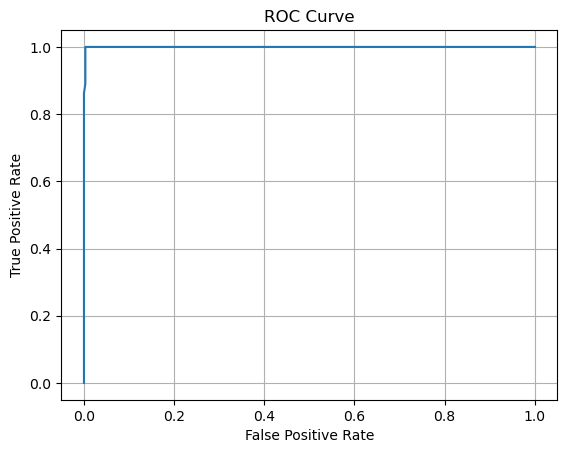

In [70]:
# 9. Plotting the ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

In [71]:
# 10. Cross Validation

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print('Cross Validation Accuracy: ', np.mean(cv_scores))

Cross Validation Accuracy:  0.9899234277148293


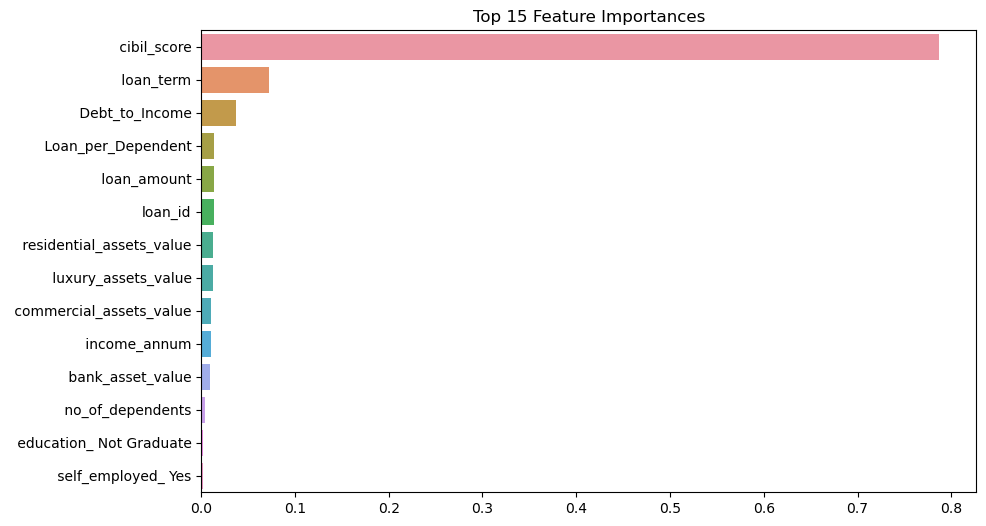

In [72]:
# 11. Feature Importance

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize = (10,6))
sns.barplot(x=importances[:15],y=importances.index[:15])
plt.title('Top 15 Feature Importances')
plt.show()

In [73]:
# 12. Hyperparameter Tuning

param_grid = {
    'n_estimators': [100,200],
    'max_depth' : [10,20,None],
    'min_samples_split' : [2,5],
    'max_features' : ['sqrt','log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                   param_grid, cv=3, scoring='accuracy')
grid.fit(X_train,y_train)
print('Best Parameters:',grid.best_params_)
best_rf = grid.best_estimator_
print('Best Accuracy on Test Set: ', accuracy_score(y_test,best_rf.predict(X_test)))

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy on Test Set:  0.9988290398126464
